In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks")

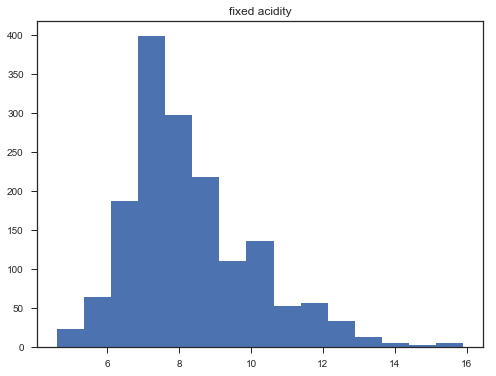

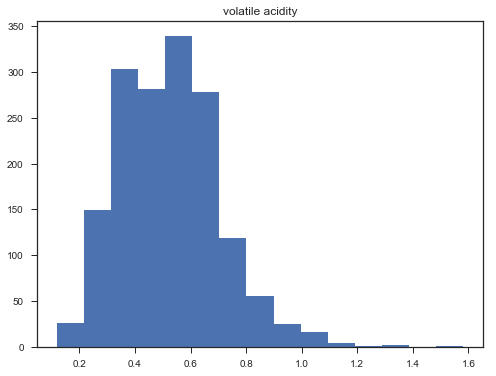

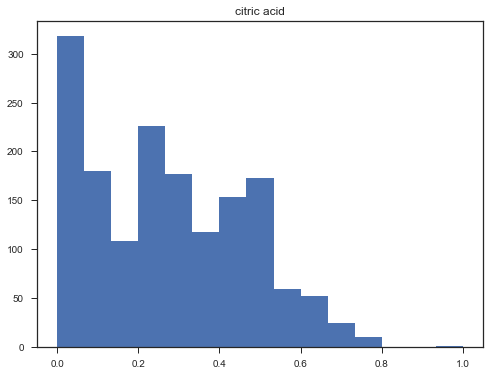

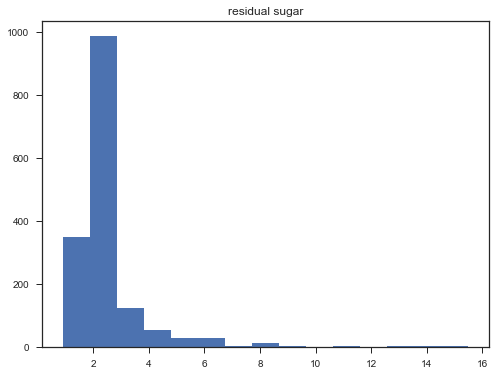

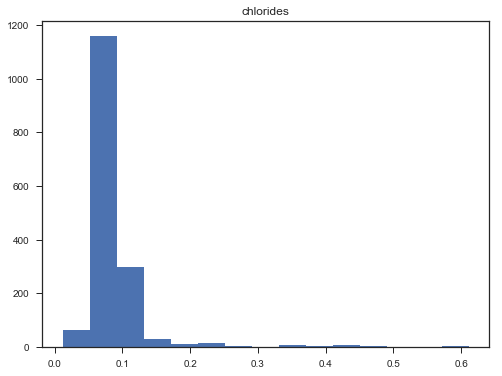

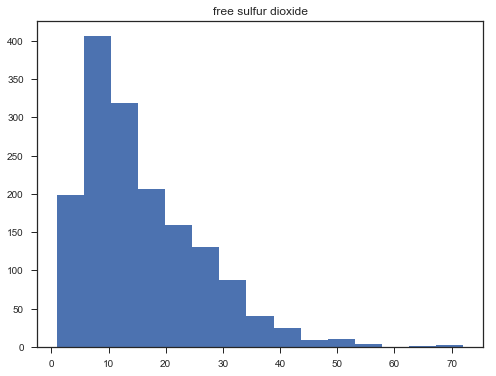

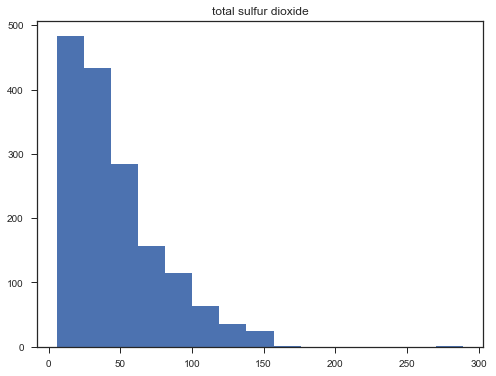

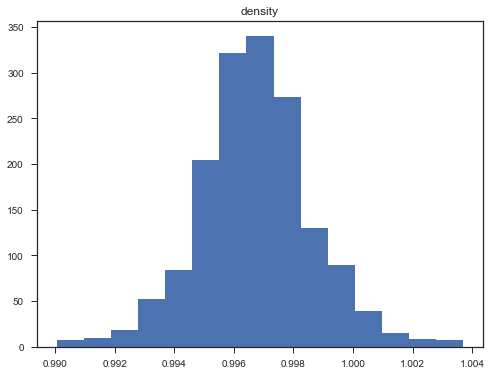

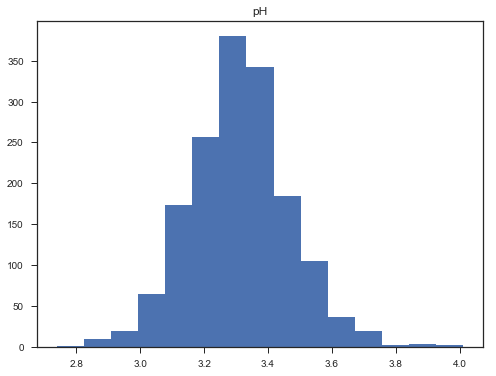

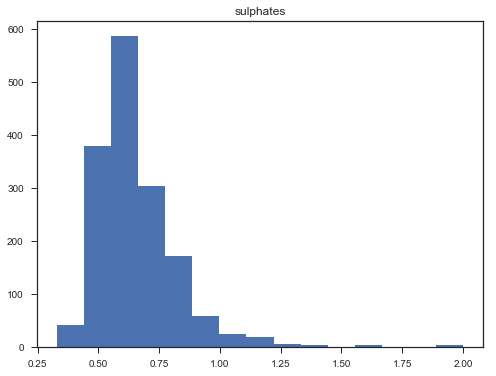

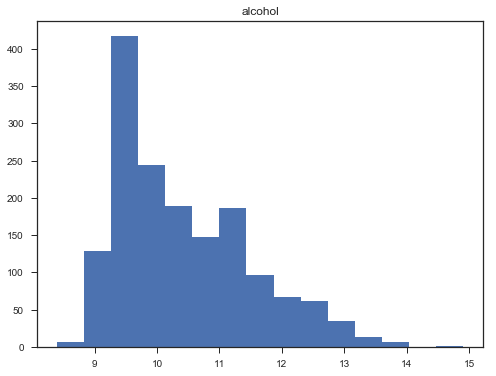

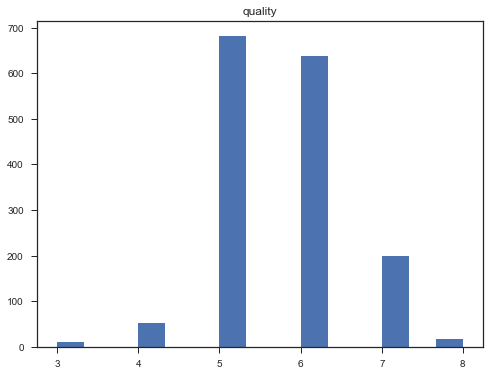

In [2]:
# =============================================================================
# I. Preprocessing
# =============================================================================
data = pd.read_csv('winequality-red.csv', sep=';')
data_2=data.values
titles=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
        'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

s=data.shape

cleaned_data = np.zeros((1451,s[1]))
mean_col=np.zeros(s[1])
std_col=np.zeros(s[1])



for j in range(s[1]):
    mean_col[j]=np.mean(data_2[:,j])
    std_col[j]=np.std(data_2[:,j])

a=0    
for i in range(s[0]):
    b=0
    for j in range(s[1]):
        if (data_2[i,j]>mean_col[j]+3*std_col[j] or data_2[i,j]<mean_col[j]-3*std_col[j]):
            b=b+1
    if b==0:
        cleaned_data[a,:] = data_2[i,:]
        a=a+1    
        

for k in range(s[1]):
    plt.figure(figsize=(8,6))    
    plt.hist(data_2[:,k], bins = 15)
    plt.title(titles[k])
    plt.show()        



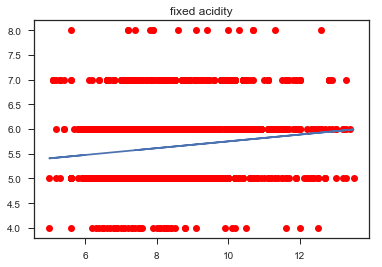

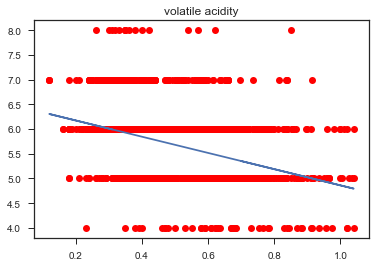

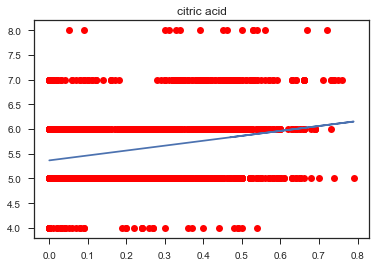

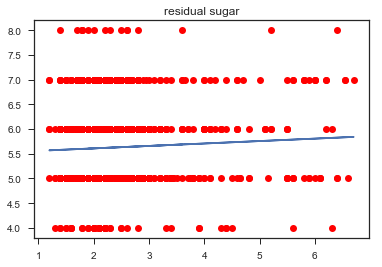

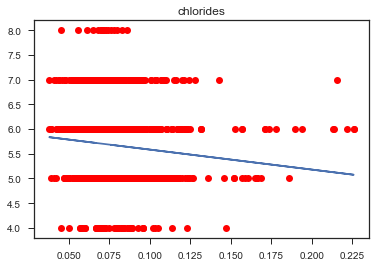

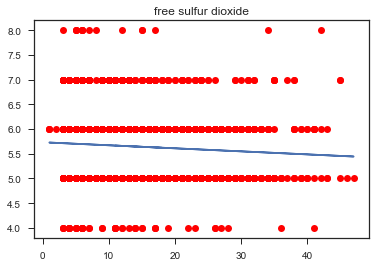

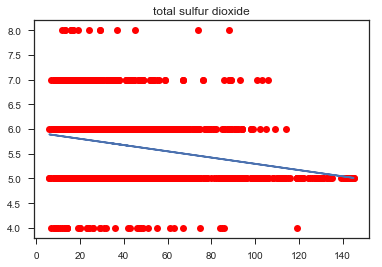

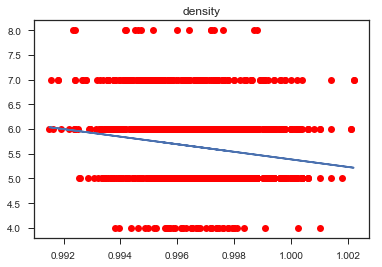

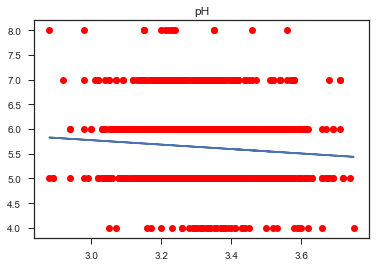

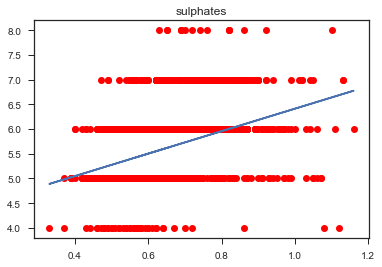

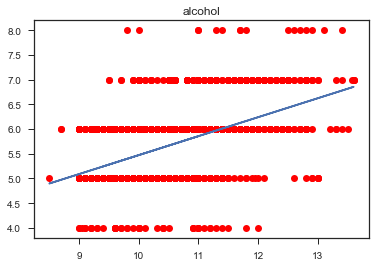

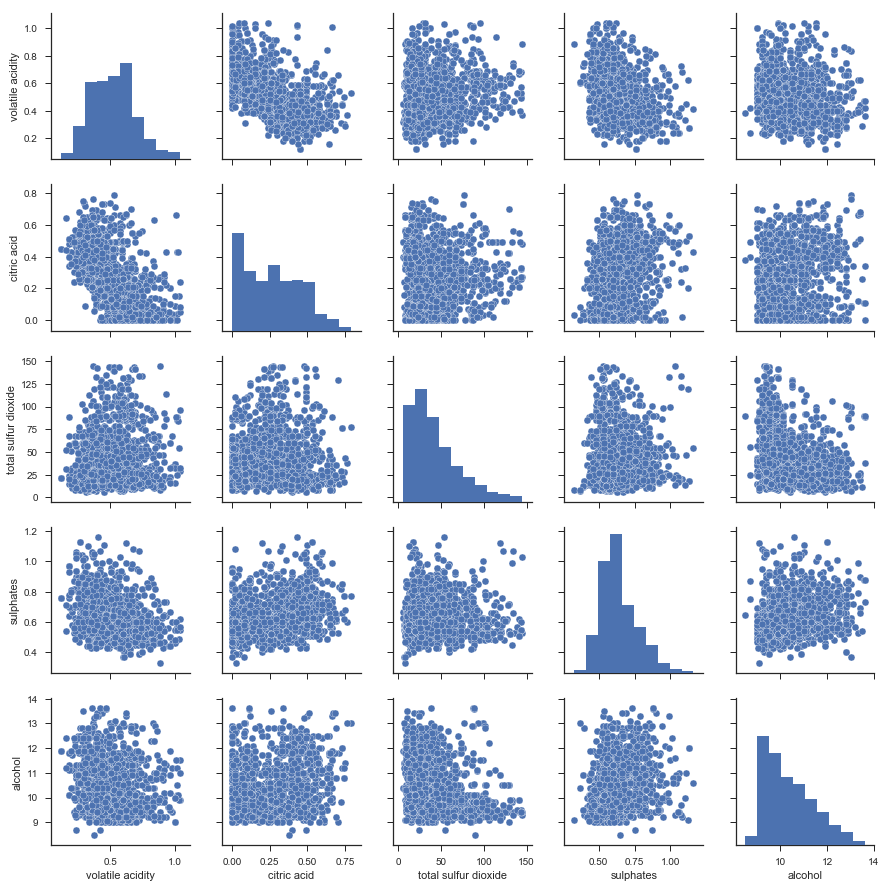

In [3]:

# =============================================================================
# III. UNIVARIATE LINEAR REGRESSION
# =============================================================================

Beta=np.zeros(s[1]-1)
Alpha=np.zeros(s[1]-1)

R_squared=np.zeros(s[1]-1)
L=np.zeros(s[1])

c=0

y_estimated=np.zeros(s[1]-1)

for j in range(0,s[1]-1):
    x=cleaned_data[:,j]
    y=cleaned_data[:,s[1]-1]
    
    Beta[j]=(np.sum((x-mean_col[j])*(y-mean_col[s[1]-1])))/(np.sum((x-mean_col[j])**2))
    Alpha[j]=mean_col[s[1]-1]-Beta[j]*mean_col[j]
    
    y_estimated=Beta[j]*x+Alpha[j]
    
    R_squared[j]=(np.sum((y_estimated-mean_col[s[1]-1])**2))/(np.sum((y-mean_col[s[1]-1])**2))
    
    plt.plot(x,y,'ro')
    plt.plot(x,y_estimated)
    plt.title(titles[j])
    plt.show()

for j in range(0,s[1]-1):
    if R_squared[j]>0.05:
        L[c]=j
        c=c+1
        
M=np.zeros((1451,c))
titles2=[]

for j in range(c):
    M[:,j]=cleaned_data[:,int(L[j])]
    titles2=titles2+[titles[int(L[j])]]
    
df = pd.DataFrame(M, columns = titles2)
sns.set(style="ticks")       
sns.pairplot(df)    

D:\Utilitaires\Anaconda\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
D:\Utilitaires\Anaconda\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in double_scalars
D:\Utilitaires\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


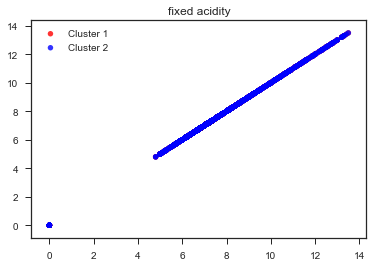

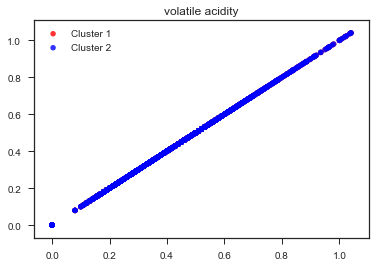

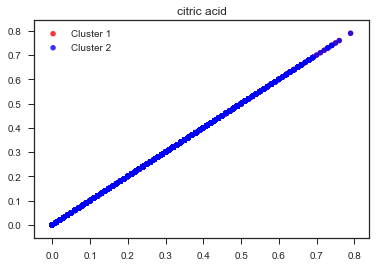

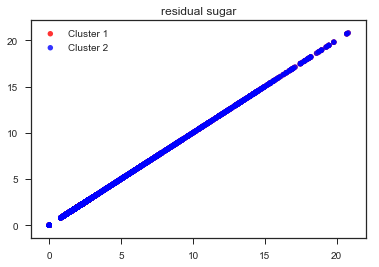

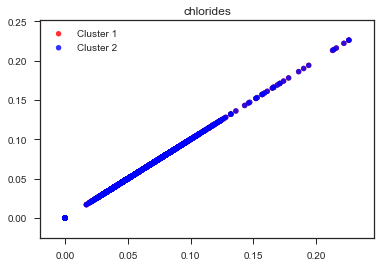

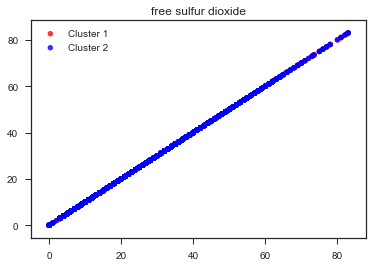

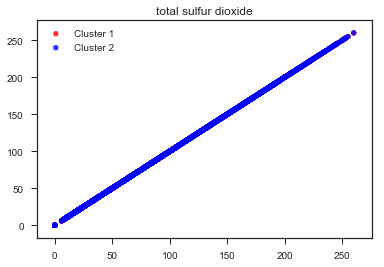

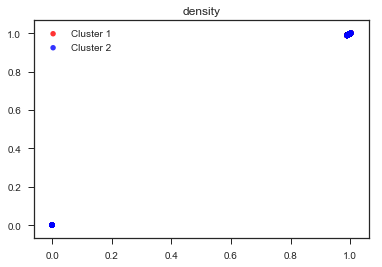

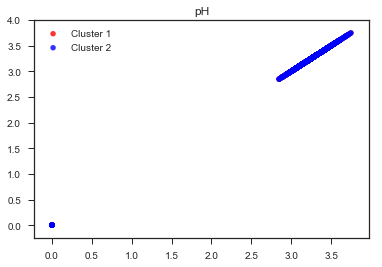

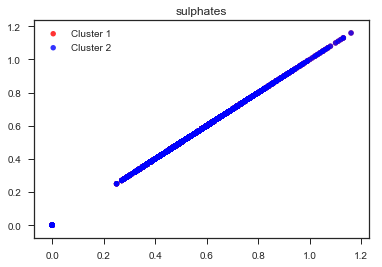

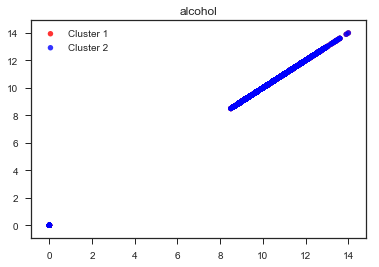

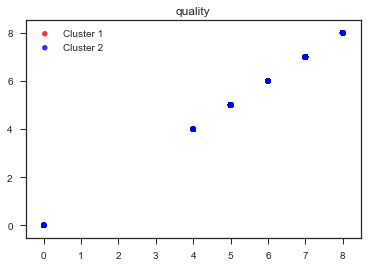

In [4]:
# =============================================================================
# VI. CLASSIFICATION
# =============================================================================

# Preprocessing of white wine

data_white = pd.read_csv('winequality-white.csv', sep=';')
data.describe()

s_white=data.shape

data_2_white=data_white.values

cleaned_data_white = np.zeros((1451,s_white[1]))
a=0
mean_col_white=np.zeros(s_white[1])
std_col_white=np.zeros(s_white[1])

for j in range(s_white[1]):
    mean_col_white[j]=np.mean(data_2_white[:,j])
    std_col_white[j]=np.std(data_2_white[:,j])


for i in range(s_white[0]):
    b=0
    for j in range(s_white[1]):
        if (data_2_white[i,j]>mean_col_white[j]+3*std_col_white[j] or data_2_white[i,j]<mean_col_white[j]-3*std_col_white[j]):
            b=b+1
    if b==0:
        cleaned_data_white[a,:] = data_2_white[i,:]
        a=a+1

# Concatenate red wine and white wine databases
cleaned_data_all=np.zeros((2902,s_white[1]+1))
cleaned_data_all[0:1451,0:s_white[1]]=cleaned_data
cleaned_data_all[1451:2902,0:s_white[1]]=cleaned_data_white
cleaned_data_all[0:1451,s_white[1]]=1 #Red wine = 1
cleaned_data_all[1451:2902,s_white[1]]=0 #White wine = 1
np.random.shuffle(cleaned_data_all) #mix the total database 

K = 2
B=np.zeros(K)
B_bis=np.zeros(K)


for j in range(s_white[1]):
    B[0]=cleaned_data_all[1000,j]
    B[1]=cleaned_data_all[2000,j]
    Cluster_1=[]
    Cluster_2=[]
    for i in range(2902):
        if np.abs(cleaned_data_all[i,j]-B[0])<np.abs(cleaned_data_all[i,j]-B[1]):
            Cluster_1=Cluster_1+[i]
        else :
            Cluster_2=Cluster_2+[i]
    B_bis[0] = np.sum(Cluster_1)/len(Cluster_1) 
    B_bis[1] = np.sum(Cluster_2)/len(Cluster_2)
    while (B_bis[0]!=B[0] and B_bis[1]!=B[1]):
        B[0]=B_bis[0]
        B[1]=B_bis[1]
        for i in range(2902):
            Cluster_1=[]
            Cluster_2=[]
            if np.abs(cleaned_data_all[i,j]-B[0])<np.abs(cleaned_data_all[i,j]-B[1]):
                Cluster_1=Cluster_1+[i]
            else :
                Cluster_2=Cluster_2+[i]
        s_Cluster1=len(Cluster_1)
        s_Cluster2=len(Cluster_2)        
        B_bis[0] = np.sum(Cluster_1)/s_Cluster1
        B_bis[1] = np.sum(Cluster_2)/s_Cluster2
    

    
    data_cluster = (Cluster_1, Cluster_2)
    colors = ("red", "blue")
    groups = ("Cluster 1", "Cluster 2") 
 
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
    for data_cluster, color, group in zip(data_cluster, colors, groups):
        x = cleaned_data_all[:,j]
        y = cleaned_data_all[:,j]
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
    plt.title(titles[j])
    plt.legend(loc=2)
    plt.show()
          
            

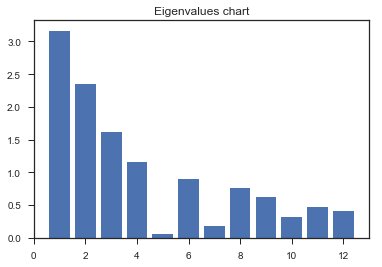

In [5]:
# =============================================================================
# PCA
# =============================================================================

X = cleaned_data 

###Normalisation###
mean = sum(X[:])/len(X)
var = sum(X[:]**2/len(X))-mean**2
X = X[:]-mean
X = X[:]/(var**(1/2))

###Eigenvalues/vectors###
D_vp,V = np.linalg.eig(np.dot(np.transpose(X),X)/(len(X)-1)) 
D = np.diag(D_vp)

axis_x = [i for i in range(1,13)]
axis_y = [i for i in D_vp]
plt.bar(axis_x,axis_y)
plt.title('Eigenvalues chart')
plt.show()

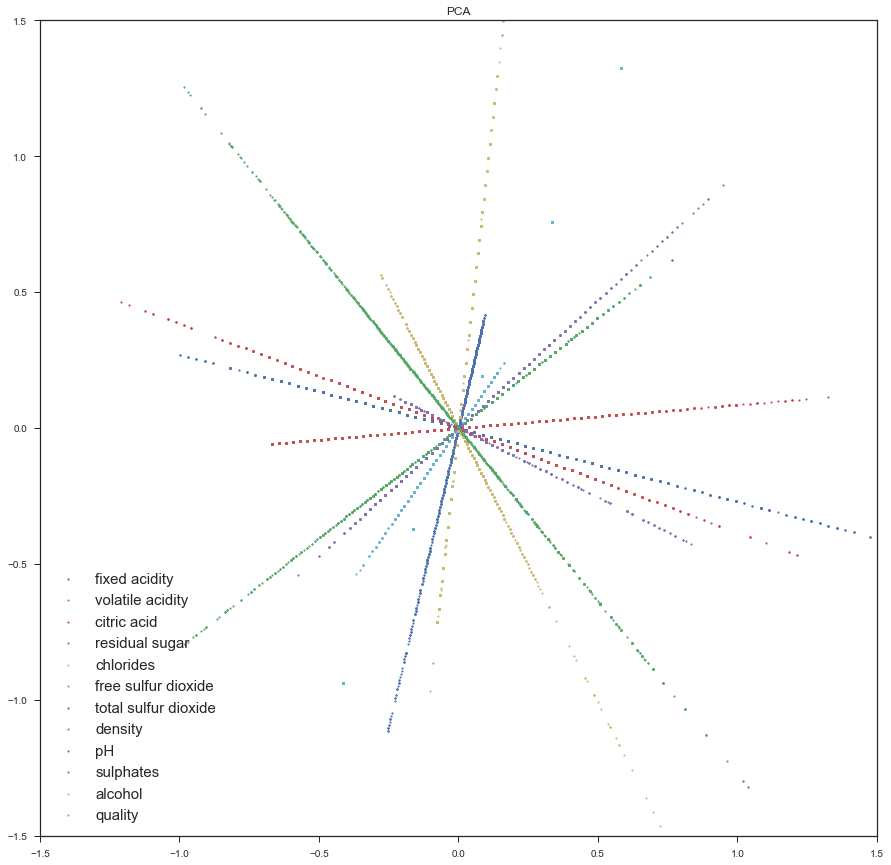

In [6]:
###Projections PCA###
PCA_x = np.zeros((len(X),12))
PCA_y = np.zeros((len(X),12))
for i in range(0,12) : PCA_x[:,i] = X[:,i]*V[i,0] 
for i in range(0,12) : PCA_y[:,i] = X[:,i]*V[i,1] 

plt.figure(figsize=(15, 15)) 
for ii in range(0,12):
    axis_x = [i for i in PCA_x[:,ii]]
    axis_y = [i for i in PCA_y[:,ii]]
    plt.scatter(axis_x, axis_y,s=3, label=titles[ii])
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
plt.legend(loc=3, prop={'size': 15}) 
plt.title('PCA')
plt.show()

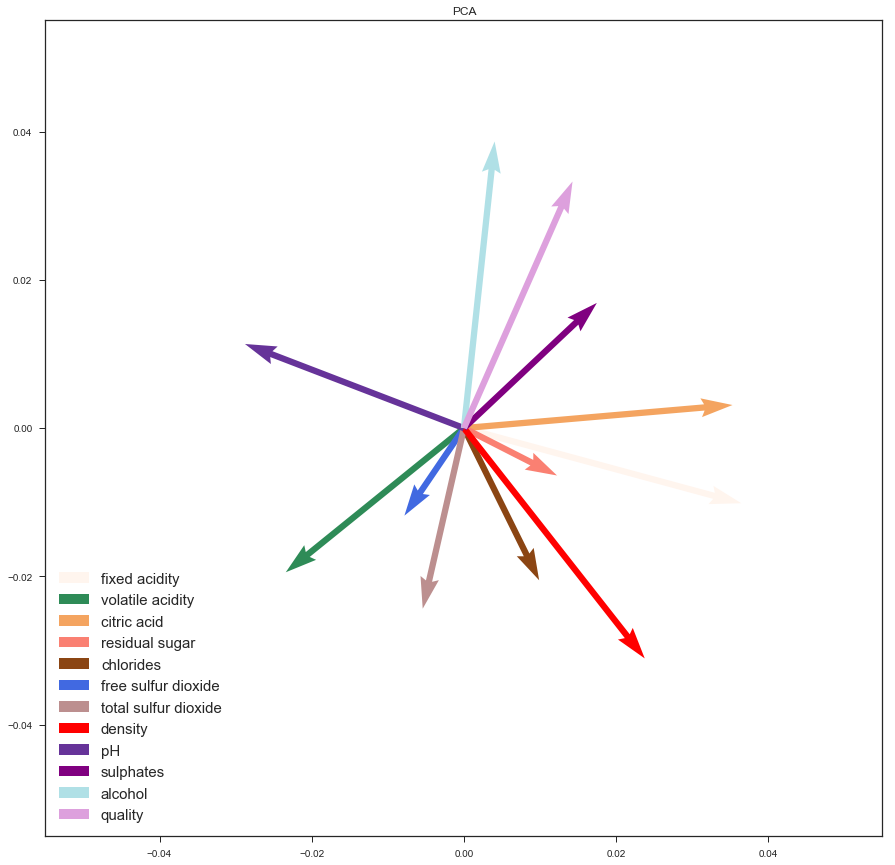

In [7]:
###Format vectoriel###

import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())
origin = [0], [0] 

plt.figure(figsize=(15, 15)) 
for ii in range(0,12):
    plt.quiver(*origin,V[ii,0],V[ii,1],scale=1.5,color=colors_list[-ii-40],label=titles[ii])

plt.legend(loc=3, prop={'size': 15}) 
plt.title('PCA')
plt.show()

In [8]:
# =============================================================================
# Multivariate linear regression
# =============================================================================
quality = X[:,11]
quality_mean = sum(quality)/len(X)


data_set = X[:,0:11]
mean_data_set = sum(data_set[:])/len(X)
data_set = data_set[:]- mean_data_set

xty = np.dot(np.transpose(data_set),quality)
xtx = np.dot(np.transpose(data_set),data_set)
beta = np.dot(np.linalg.inv(xtx),xty)

rss = sum((np.dot(data_set,beta) - quality_mean)**2)
quality_var = sum((quality - quality_mean)**2)
R2 = rss/quality_var
print('R2 =' ,R2)

R2 = 0.37965118295639894


In [9]:
###From normalized data###

data_set_norm = data_set - mean_data_set
var_data_set = sum(data_set[:]**2/len(X))-mean_data_set**2
data_set_norm = data_set_norm[:]/(var_data_set**(1/2))

xty = np.dot(np.transpose(data_set_norm),quality)
xtx = np.dot(np.transpose(data_set_norm),data_set_norm)
beta_norm = np.dot(np.linalg.inv(xtx),xty)

rss = sum((np.dot(data_set_norm,beta) - quality_mean)**2)
R2 = rss/quality_var
print('R2 =' ,R2)

R2 = 0.37965118296355543


In [10]:
# =============================================================================
# Lasso Regression
# =============================================================================
test_set = data_set[499:-1]

train_set = data_set[0:500]
mean_train_set= np.mean(train_set[:])
std_train_set = np.std(train_set[:])
train_set = (train_set - mean_train_set)/std_train_set

test_Y = quality[499:-1] 

train_Y = quality[0:500] 
mean_train_Y= np.mean(train_Y[:])
std_train_Y = np.std(train_Y[:])
train_Y = (train_Y - mean_train_Y)#/std_train_Y


xtx =  np.dot(np.transpose(train_set),train_set)
xty = np.dot(np.transpose(train_set),train_Y)
beta = np.dot(np.linalg.inv(xtx),xty)

residual = train_Y - np.dot(train_set,beta)
rss = sum((np.dot(train_set,beta) - mean_train_Y)**2)
train_Y_var = sum((train_Y - mean_train_Y)**2)
R2 = rss/train_Y_var
print('R2 =' ,R2)
print('beta =' ,beta)

R2 = 0.3626036963137442
beta = [ 0.03061749 -0.17590353 -0.06119326 -0.02742896 -0.06034869  0.00346869
 -0.1853974   0.08014681 -0.05274171  0.16164636  0.43827969]


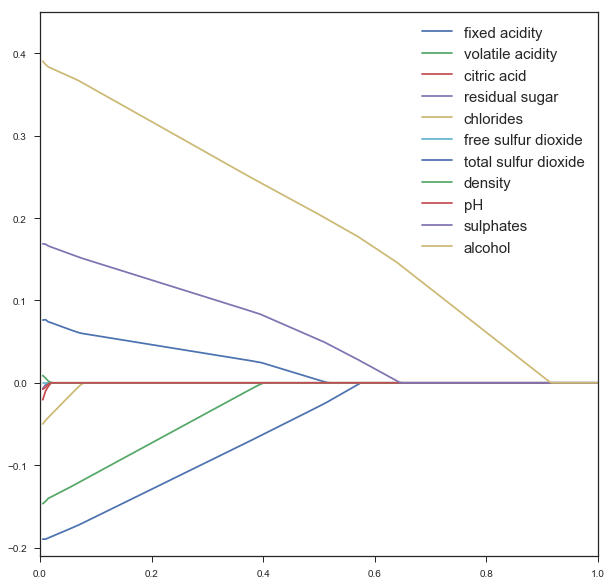

In [11]:
###Alghorithm###

N_test = 500
N_iter = 20
Lambda = np.arange(1,0,-0.005)
beta_matrix = np.zeros((11,len(Lambda)))
beta_lasso = beta

a=0

for i in Lambda:
    
    previous_beta_lasso = np.zeros(11)
    
    for ii in range(0,N_iter):
        
        beta_matrix[:,a] = beta_lasso   
        
        if (previous_beta_lasso.any()>beta_lasso.all()): break
          
        previous_beta_lasso = beta_lasso
        residual = train_Y - np.dot(train_set,beta_lasso)
        u = beta_lasso + np.dot(np.transpose(train_set),residual)/(N_test)
        sign = u/abs(u)
    
        for iii in range(0,11):
            if abs(u[iii]) - i/2 > 0:
                beta_lasso[iii] = sign[iii]*(abs(u[iii]) - i/2)
            else:
                beta_lasso[iii] = 0
            
    
    a+=1    
plt.figure(figsize=(10, 10)) 
for i in range(0,11):
    plt.plot(Lambda,beta_matrix[i,:],label=titles[i])
    plt.ylim(-0.21, 0.45)
    plt.xlim(0,1)
plt.legend(loc=1, prop={'size': 15}) 
plt.show()    



In [12]:
# =============================================================================
# VI. CLASSIFICATION
# =============================================================================

# Preprocessing of white wine

data_white = pd.read_csv('winequality-white.csv', sep=';')
data.describe()

s_white=data.shape

data_2_white=data_white.values

cleaned_data_white = np.zeros((1451,s_white[1]))
a=0
mean_col_white=np.zeros(s_white[1])
std_col_white=np.zeros(s_white[1])

for j in range(s_white[1]):
    mean_col_white[j]=np.mean(data_2_white[:,j])
    std_col_white[j]=np.std(data_2_white[:,j])


for i in range(s_white[0]):
    b=0
    for j in range(s_white[1]):
        if (data_2_white[i,j]>mean_col_white[j]+3*std_col_white[j] or data_2_white[i,j]<mean_col_white[j]-3*std_col_white[j]):
            b=b+1
    if b==0:
        cleaned_data_white[a,:] = data_2_white[i,:]
        a=a+1

# Concatenate red wine and white wine databases
cleaned_data_all=np.zeros((2902,s_white[1]+1))
cleaned_data_all[0:1451,0:s_white[1]]=cleaned_data
cleaned_data_all[1451:2902,0:s_white[1]]=cleaned_data_white
cleaned_data_all[0:1451,s_white[1]]=1 #Red wine = 1
cleaned_data_all[1451:2902,s_white[1]]=0 #White wine = 1
#np.random.shuffle(cleaned_data_all) #mix the total database 

titles_all=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
        'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','color']


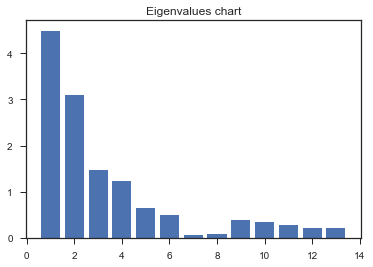

In [13]:
# =============================================================================
# PCA
# =============================================================================

X = cleaned_data_all 

###Normalisation###
mean = sum(X[:])/len(X)
var = sum(X[:]**2/len(X))-mean**2
X = X[:]-mean
X = X[:]/(var**(1/2))

###Eigenvalues/vectors###
D_vp,V = np.linalg.eig(np.dot(np.transpose(X),X)/(len(X)-1)) 
D = np.diag(D_vp)

axis_x = [i for i in range(1,14)]
axis_y = [i for i in D_vp]
plt.bar(axis_x,axis_y)
plt.title('Eigenvalues chart')
plt.show()

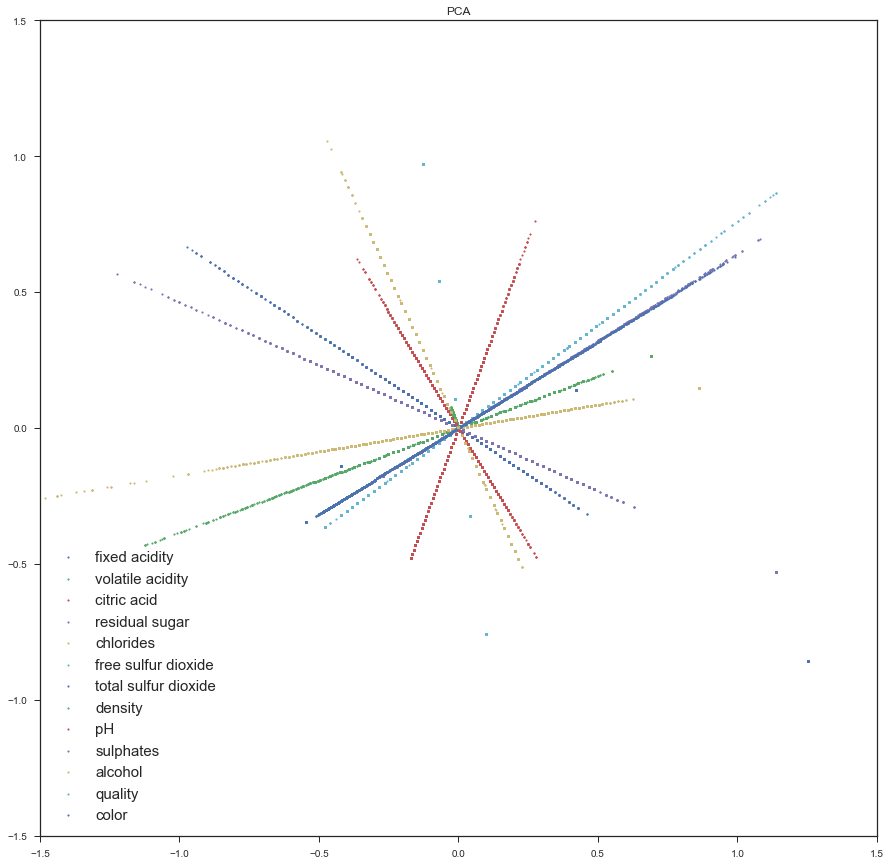

In [14]:
###Projections PCA###
PCA_x = np.zeros((len(X),13))
PCA_y = np.zeros((len(X),13))
for i in range(0,13) : PCA_x[:,i] = X[:,i]*V[i,0] 
for i in range(0,13) : PCA_y[:,i] = X[:,i]*V[i,1] 

plt.figure(figsize=(15, 15)) 
for ii in range(0,13):
    axis_x = [i for i in PCA_x[:,ii]]
    axis_y = [i for i in PCA_y[:,ii]]
    plt.scatter(axis_x, axis_y,s=3, label=titles_all[ii])
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
plt.legend(loc=3, prop={'size': 15}) 
plt.title('PCA')
plt.show()

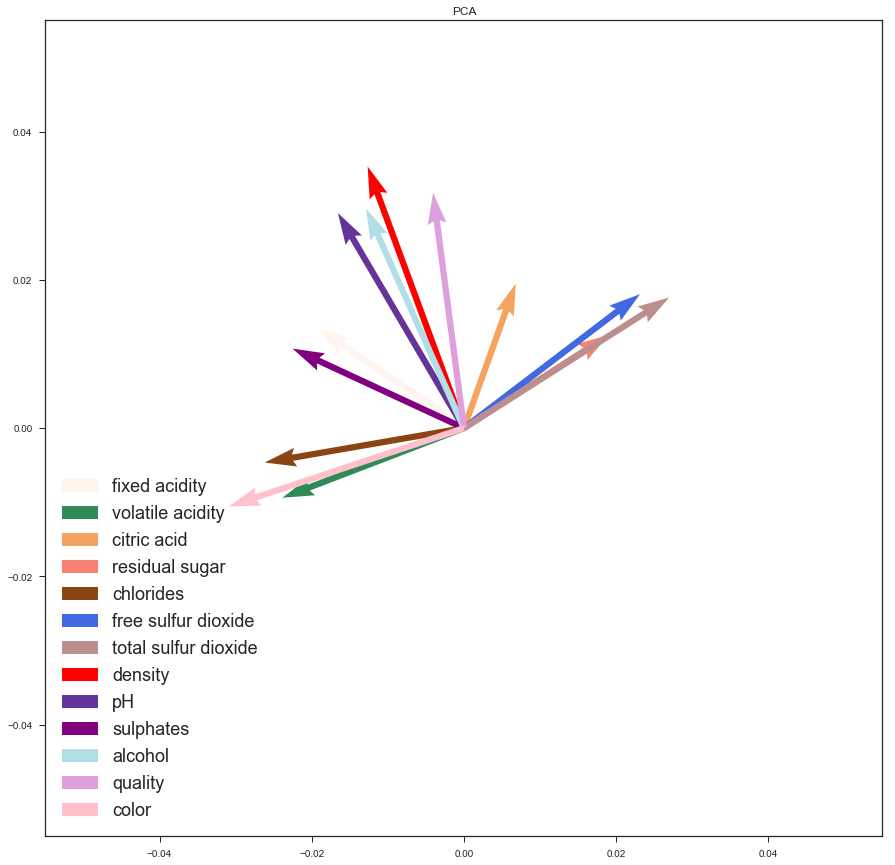

In [15]:
###Format vectoriel###

import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())
origin = [0], [0] 

plt.figure(figsize=(15, 15)) 
for ii in range(0,13):
    plt.quiver(*origin,V[ii,0],V[ii,1],scale=1.5,color=colors_list[-ii-40],label=titles_all[ii])

plt.legend(loc=3, prop={'size': 18}) 
plt.title('PCA')
plt.show()

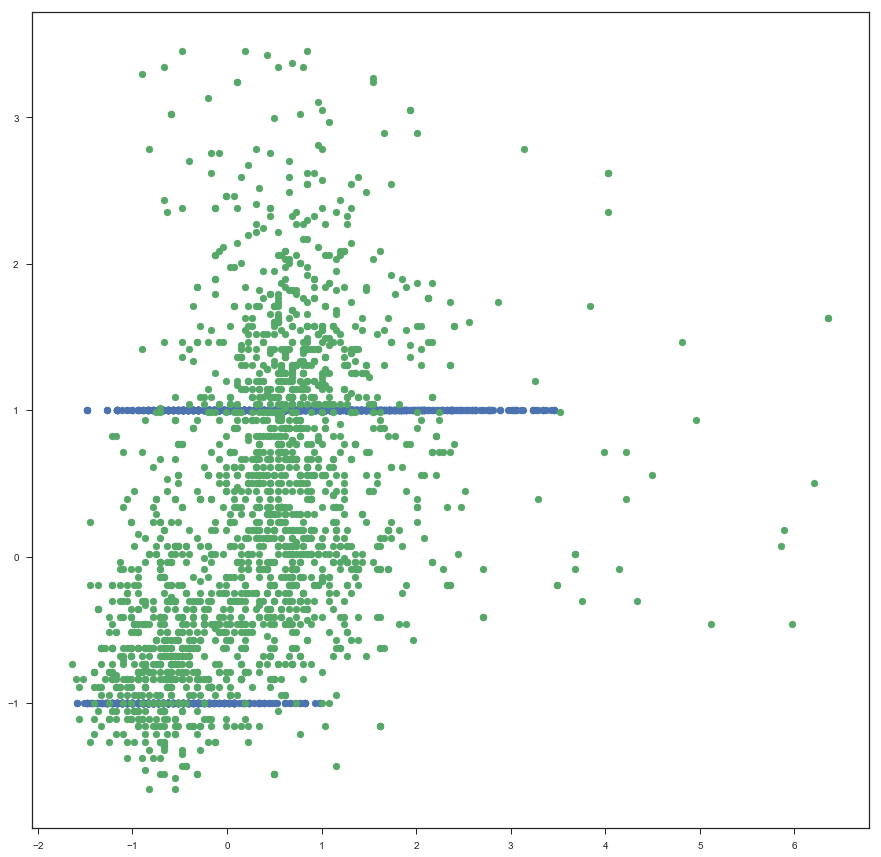

In [16]:
plt.figure(figsize=(15, 15)) 
plt.scatter(X[1:2000,1],X[1:2000,-1])
plt.scatter(X[1:2000,4],X[1:2000,1])

plt.show()


In [17]:
K = 2
B=np.zeros(K)
B_bis=np.zeros(K)


for j in range(s_white[1]):
    B[0]=cleaned_data_all[1000,j]
    B[1]=cleaned_data_all[2000,j]
    Cluster_1=[]
    Cluster_2=[]
    for i in range(2902):
        if np.abs(cleaned_data_all[i,j]-B[0])<np.abs(cleaned_data_all[i,j]-B[1]):
            Cluster_1=Cluster_1+[i]
        else :
            Cluster_2=Cluster_2+[i]
    B_bis[0] = np.sum(Cluster_1)/len(Cluster_1) 
    B_bis[1] = np.sum(Cluster_2)/len(Cluster_2)
    while (B_bis[0]!=B[0] and B_bis[1]!=B[1]):
        B[0]=B_bis[0]
        B[1]=B_bis[1]
        for i in range(2902):
            Cluster_1=[]
            Cluster_2=[]
            if np.abs(cleaned_data_all[i,j]-B[0])<np.abs(cleaned_data_all[i,j]-B[1]):
                Cluster_1=Cluster_1+[i]
            else :
                Cluster_2=Cluster_2+[i]
        s_Cluster1=len(Cluster_1)
        s_Cluster2=len(Cluster_2)        
        B_bis[0] = np.sum(Cluster_1)/s_Cluster1
        B_bis[1] = np.sum(Cluster_2)/s_Cluster2
    

    
    data_cluster = (Cluster_1, Cluster_2)
    colors = ("red", "blue")
    groups = ("Cluster 1", "Cluster 2") 

D:\Utilitaires\Anaconda\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
D:\Utilitaires\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
D:\Utilitaires\Anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
